In [110]:
import pandas as pd
import numpy as np
from ydata_profiling import ProfileReport
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer
from sklearn.tree import DecisionTreeRegressor
df=pd.read_csv('hwc.csv')
df.head()
df['P_GRAVITY_2']=df['P_MASS']*df['P_RADIUS']*df['P_RADIUS']
data=df[['P_MASS', 'P_RADIUS', 'P_PERIOD', 'P_SEMI_MAJOR_AXIS', 'P_ECCENTRICITY', 'P_INCLINATION',
'P_TEMP_SURF', 'P_TEMP_EQUIL', 'P_GRAVITY', 'P_DENSITY', 'S_TEMPERATURE', 'S_LUMINOSITY',
'S_RADIUS', 'S_MASS', 'S_HZ_OPT_MIN', 'S_HZ_OPT_MAX', 'S_HZ_CON_MIN', 'S_HZ_CON_MAX','P_ESI','P_GRAVITY_2']]
a=data.columns


features=data.copy()
# features_null=data.drop(columns=["P_ESI"] , axis=1)
features.isnull().sum()
features_null_ESI=features[features["P_ESI"].isnull()]
features_null_ESI

to_be_imputed=features[~features.isin(features_null_ESI.to_dict('list')).all(axis=1)]
to_be_imputed
to_be_imputed_no_ESI=to_be_imputed.drop(columns=["P_ESI"])
imputer=IterativeImputer(estimator=DecisionTreeRegressor(), max_iter=10,random_state=143)
imputed=imputer.fit_transform(to_be_imputed_no_ESI)
# c=imputer.transform(features)
imputed_features=pd.DataFrame(imputed,columns=to_be_imputed_no_ESI.columns)

x_tr,x_te,y_tr,y_te=train_test_split(imputed_features,to_be_imputed['P_ESI'],test_size=0.3,random_state=37)


model=RandomForestRegressor()
model.fit(x_tr,y_tr)
predicted=model.predict(x_te)

from sklearn.metrics import mean_squared_error, r2_score
 

# Evaluating the model
mse = mean_squared_error(y_te, predicted)
print(f'Mean Squared Error: {mse}')
 
r2 = r2_score(y_te, predicted)
print(f'R-squared: {r2}')


E:\gAME\New folder\Lib\site-packages\sklearn\impute\_iterative.py:796: ConvergenceWarning: [IterativeImputer] Early stopping criterion not reached.
  warnings.warn(


Mean Squared Error: 7.775772060329468e-05
R-squared: 0.9958151727854461


<BarContainer object of 19 artists>

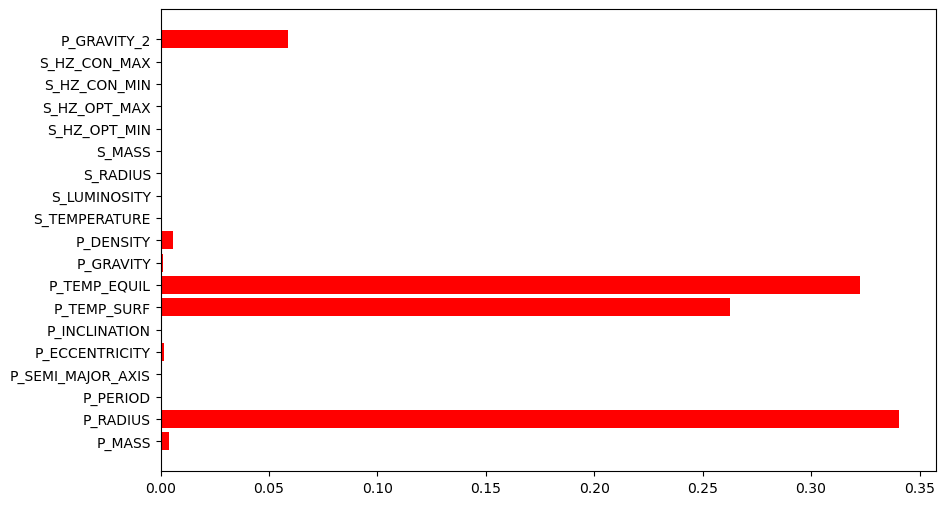

In [111]:
import matplotlib.pyplot as plt
feature_names = imputed_features.columns
feature_importances = model.feature_importances_

feature_importances
plt.figure(figsize=(10, 6))
plt.barh(feature_names,feature_importances,color="red")

In [112]:
import pandas as pd
import numpy as np
from ydata_profiling import ProfileReport
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer
from sklearn.tree import DecisionTreeRegressor
df=pd.read_csv('hwc.csv')
df.head()
# df['P_GRAVITY_2']=df['P_MASS']*df['P_RADIUS']*df['P_RADIUS']
data=df[[ 'P_RADIUS', 'P_TEMP_EQUIL','P_ESI']]
a=data.columns


features=data.copy()
# features_null=data.drop(columns=["P_ESI"] , axis=1)
features.isnull().sum()
features_null_ESI=features[features["P_ESI"].isnull()]
features_null_ESI

to_be_imputed=features[~features.isin(features_null_ESI.to_dict('list')).all(axis=1)]
to_be_imputed
to_be_imputed_no_ESI=to_be_imputed.drop(columns=["P_ESI"])
imputer=IterativeImputer(estimator=DecisionTreeRegressor(), max_iter=10,random_state=143)
imputed=imputer.fit_transform(to_be_imputed_no_ESI)
# c=imputer.transform(features)
imputed_features=pd.DataFrame(imputed,columns=to_be_imputed_no_ESI.columns)

x_tr,x_te,y_tr,y_te=train_test_split(imputed_features,to_be_imputed['P_ESI'],test_size=0.3,random_state=37)


model=RandomForestRegressor()
model.fit(x_tr,y_tr)
predicted=model.predict(x_te)

from sklearn.metrics import mean_squared_error, r2_score
 

# Evaluating the model
mse = mean_squared_error(y_te, predicted)
print(f'Mean Squared Error: {mse}')
 
r2 = r2_score(y_te, predicted)
print(f'R-squared: {r2}')


Mean Squared Error: 9.347317812556827e-05
R-squared: 0.9949693857199544


<BarContainer object of 2 artists>

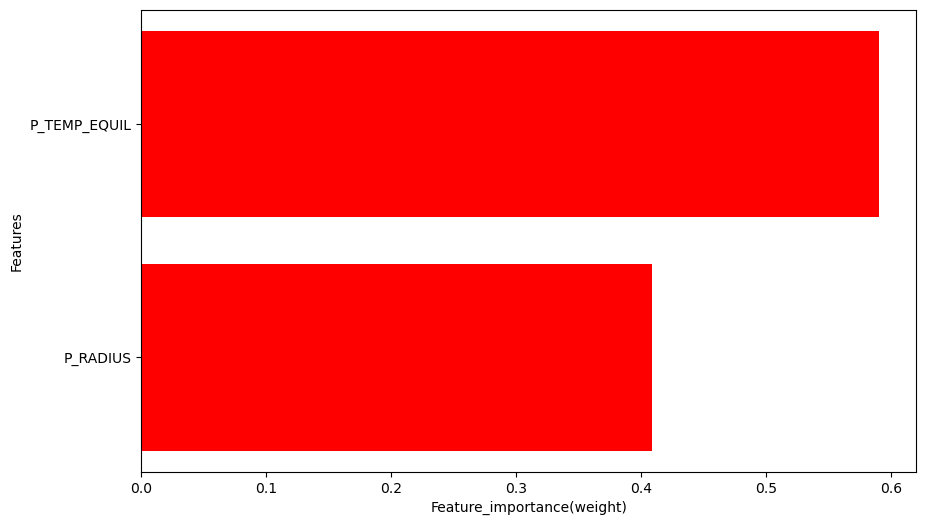

In [113]:
import matplotlib.pyplot as plt
feature_names = imputed_features.columns
feature_importances = model.feature_importances_
feature_importances
plt.figure(figsize=(10, 6))
plt.xlabel("Feature_importance(weight)")
plt.ylabel("Features")
plt.barh(feature_names,feature_importances,color="red")

In [122]:
df2=pd.read_csv("kepler.csv")
# print(df2.columns)
features=df2[["koi_prad","koi_teq"]]
features.rename(columns={'koi_prad':'P_RADIUS','koi_teq':'P_TEMP_EQUIL'},inplace="True")
imputed_kepler=imputer.fit_transform(features)
# c=imputer.transform(features)
imputed_features_kepler=pd.DataFrame(imputed_kepler,columns=features.columns)


prediction_kepler=model.predict(imputed_features_kepler)
prediction_kepler
df2['P_ESI']=prediction_kepler
result=df2[['kepoi_name','kepler_name','P_ESI']]
sorted_res=result.sort_values(by='P_ESI',ascending=False)
sorted_res.head(10)






C:\Users\aryan\AppData\Local\Temp\ipykernel_20840\1539102510.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  features.rename(columns={'koi_prad':'P_RADIUS','koi_teq':'P_TEMP_EQUIL'},inplace="True")


,kepoi_name,kepler_name,P_ESI
6016,K01422.05,Kepler-296 e,0.913038
6100,K03447.01,NaN,0.910761
9486,K07963.01,NaN,0.910164
4115,K04330.01,NaN,0.909757
7098,K05958.01,NaN,0.907279
8390,K07219.01,NaN,0.904802
4733,K04878.01,NaN,0.900894
6432,K05123.01,NaN,0.900788
4839,K04830.01,NaN,0.899975
6245,K05330.01,NaN,0.899647


In [120]:
import pandas as pd
data_frame=pd.read_csv("tess.csv")
features=data_frame[["pl_rade","pl_eqt"]]
features.rename(columns={'pl_rade':'P_RADIUS','pl_eqt':'P_TEMP_EQUIL'},inplace="True")
imputed_kepler=imputer.fit_transform(features)
# c=imputer.transform(features)
imputed_features_kepler=pd.DataFrame(imputed_kepler,columns=features.columns)


prediction_kepler=model.predict(imputed_features_kepler)
prediction_kepler
data_frame['P_ESI']=prediction_kepler
result=data_frame[['pl_name','hostname','P_ESI']]
sorted_res=result.sort_values(by='P_ESI',ascending=False)
sorted_res.head(10)


C:\Users\aryan\AppData\Local\Temp\ipykernel_20840\511833440.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  features.rename(columns={'pl_rade':'P_RADIUS','pl_eqt':'P_TEMP_EQUIL'},inplace="True")


,pl_name,hostname,P_ESI
442,TOI-715 b,TOI-715,0.842766
246,TOI-2095 c,TOI-2095,0.765612
273,TOI-2285 b,TOI-2285,0.742593
270,TOI-2257 b,TOI-2257,0.722962
85,LHS 1678 c,LHS 1678,0.714487
12,Gliese 12 b,Gliese 12,0.714487
438,TOI-700 e,TOI-700,0.714487
466,TOI-904 c,TOI-904,0.665623
359,TOI-4336 A b,TOI-4336 A,0.645520
174,TOI-1452 b,TOI-1452,0.620218


#Top 10 planets with ESI in kepler dataset


	kepoi_name	kepler_name	P_ESI
6016	K01422.05	Kepler-296 e	0.913038
6100	K03447.01	NaN         	0.910761
9486	K07963.01	NaN         	0.910164
4115	K04330.01	NaN         	0.909757
7098	K05958.01	NaN         	0.907279
8390	K07219.01	NaN	            0.904802
4733	K04878.01	NaN	            0.900894
6432	K05123.01	NaN	            0.900788
4839	K04830.01	NaN	            0.899975
6245	K05330.01	NaN	            0.899647








#Top 10 planets with ESI in kepler dataset

	pl_name	hostname	P_ESI
442	TOI-715 b	TOI-715	    0.842766
246	TOI-2095 c	TOI-2095	0.765612
273	TOI-2285 b	TOI-2285	0.742593
270	TOI-2257 b	TOI-2257	0.722962
85	LHS 1678 c	LHS 1678	0.714487
12	Gliese 12 b	Gliese 12	0.714487
438	TOI-700 e	TOI-700	    0.714487
466	TOI-904 c	TOI-904 	0.665623
359	TOI-4336 A b TOI-4336 A	0.645520
174	TOI-1452 b	TOI-1452	0.620218
